In [1]:
from pylab import *

In [2]:
f = lambda t, gamma: exp(-gamma*t)

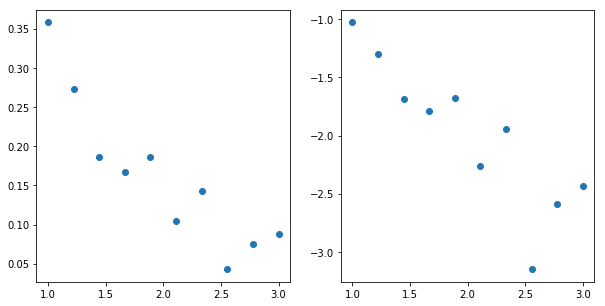

In [3]:
# generating data
T = linspace(1, 3, 10)
gamma_true = 1
x = f(T, gamma_true)
# add noise
x += (rand(len(x)) - 0.5) * 0.1
x[x<=0] = 0.01

figure(figsize=(10, 5))
subplot(121)
plot(T, x, 'o')

subplot(122)
plot(T, log(x), 'o')

In [4]:
def t_inv(x, gamma, lbound=None):
    if lbound is not None:
        x[x<lbound] = lbound
    return -log(x)/gamma

def fit_gamma(x, t, lbound=None):
    if lbound is not None:
        x[x<lbound] = lbound
    y = log(x)
    
    tm = mean(t)
    ym = mean(y)
    var_t = mean(t**2) - tm**2
    cov = mean(y * t) - ym * tm
    
    k = cov/var_t
    b = ym - k*tm
    return -k, exp(b)

gamma = 0.8201
x0 = 0.7087


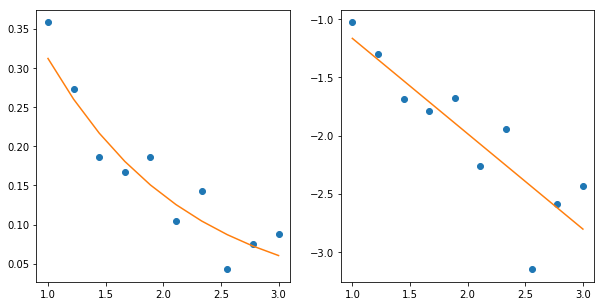

In [5]:
gamma, x0 = fit_gamma(x, T, 1e-12)
print('gamma = %.4f'%gamma)
print('x0 = %.4f'%x0)

figure(figsize=(10, 5))
subplot(121)
plot(T, x, 'o')
plot(T, x0*f(T, gamma))

subplot(122)
plot(T, log(x), 'o')
plot(T, log(x0) + -gamma*T)

In [6]:
# suppose we don't have the time T, and we want to estimate gamma
gamma_0 = 0.5
gamma = gamma_0
for i in range(5):
    tau = t_inv(x, gamma, 1e-12)
    gamma, _ = fit_gamma(x, tau, 1e-12)
print('gamma = %.4f'%gamma)

gamma = 0.5000


In [7]:
tau

array([2.05328301, 2.59785157, 3.36302353, 3.57055256, 3.35738042,
       4.51945017, 3.88375786, 6.3029914 , 5.17997436, 4.86026279])